# Assignment 5: Data Preprocessing

# Setup

Import python libraries

In [1]:
% pylab inline

import pandas as pd
import seaborn


from sklearn import model_selection
from sklearn import pipeline, feature_selection, linear_model, preprocessing, metrics


seaborn.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


We'll be using the Ames Housing dataset during this exercise. Below we'll read the data in and display the first five rows.

In [2]:
ames_df = pd.read_csv("http://www.amstat.org/publications/jse/v19n3/Decock/AmesHousing.txt", delimiter="\t")
ames_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


We see that there are a mixture of numerical, categorical, and NaN values in the dataset. Below we will select only numerical features and drap any NaN values

In [3]:
num_cols = [c for c in ames_df.columns if ames_df[c].dtype in ['int64', 'float64']]
ames_df = ames_df[num_cols].copy()

ames_df.dropna(inplace=True)

In [4]:
ames_df.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,0,0,0,0,4,2010,244000
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,212,34,0,0,0,0,0,3,2010,189900


We'll be working to predict the sales price of the house. Below we store the target sales price in a variable named y. We remove the SalesPrice, Order, and PID as features and store the remaining columns in a variable named x. We then split the dataset into a training and testing set.

In [6]:
y = ames_df['SalePrice']
x = ames_df.drop(['Order', 'PID', 'SalePrice'], axis = 1)

x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y)

## Demo

We're going to use sklearn's pipelines to organize our workflow as well as the following for preprocessing and modeling. 
* StandardScaler: scales all input features to have a mean of zero and std of one
* SelectPercentile: selects the 20 best features
* LinearRegression: the model we'll use today

Below is a demo of how to fit and evaluate a pipeline. 

In [9]:
first_pipe = pipeline.Pipeline([
    ("scale", preprocessing.StandardScaler()),
    ("selection", feature_selection.SelectPercentile(feature_selection.f_regression, percentile=50)),
    ("regression", linear_model.LinearRegression()),
])

In [17]:
score = model_selection.cross_validate(first_pipe, x_train,y_train, scoring="r2", cv=5, return_train_score=True)
train_score = score['train_score'].mean()
test_score = score['test_score'].mean()

print(f"train score: {train_score}")
print(f"test score: {test_score}")

train score: 0.9554798493592374
test score: -1.0835686906921533


#  **Exercise 1: Learning Curve**

Today's lesson discussed data: How does one get it, what should it look like, and what to look out for. One important part of this topic is knowing if our model is underfit or overfit. 

To know if we are overfit or underfit, we need to plot a learning curve. A learning curve plots performance (either error or score) against some measure of complexity. We'll make our first learning curve using the number of features as the measure of complexity. 

Take the training procedure in the cell above an run it for different values of `percentile` in `SelectPercentile()`. Plot the train score vs the test score. For which values of `percentile` is the model underfit and for which is it overfit?


Hint: `first_pipe.get_params()` shows you which parameters the pipeline uses. `first_pipe.set_params()` allows you to set the parameters. How can we use this to set a different `percentile` instead of building a new model each time?

# Solution 1:

In [11]:
first_pipe.get_params()

{'memory': None,
 'regression': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 'regression__copy_X': True,
 'regression__fit_intercept': True,
 'regression__n_jobs': 1,
 'regression__normalize': False,
 'scale': StandardScaler(copy=True, with_mean=True, with_std=True),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'selection': SelectPercentile(percentile=50,
          score_func=<function f_regression at 0x11753c840>),
 'selection__percentile': 50,
 'selection__score_func': <function sklearn.feature_selection.univariate_selection.f_regression>,
 'steps': [('scale', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('selection', SelectPercentile(percentile=50,
            score_func=<function f_regression at 0x11753c840>)),
  ('regression',
   LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]}

In [12]:
p_list = np.linspace(1, 100, 25, dtype='int')
train_score = []
test_score = []

for i, p in enumerate(p_list):

    first_pipe.set_params(selection__percentile=p)

    score = model_selection.cross_validate(
        first_pipe,
        x_train,
        y_train,
        scoring="r2",
        cv=5,
        return_train_score=True)

    train_score.append(score['train_score'].mean())
    test_score.append(score['test_score'].mean())
print(max(test_score))

0.85306229167


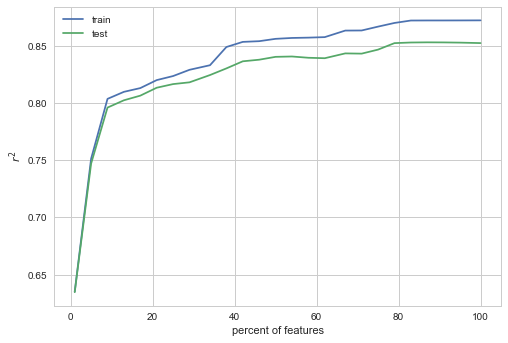

In [13]:
plt.plot(p_list, train_score, label='train')
plt.plot(p_list, test_score, label='test')
plt.ylabel("$r^2$")
plt.xlabel("percent of features")
plt.legend();

# **Exercise 2: Features Engineering**

One way to add features is through feature engineering—making new features. Revisit your pipeline and add a new step before `"scale"`. Use `preprocessing.PolynomialFeatures(degree=2, include_bias=False)` for this. You may vary the degree but you will want to be sure to keep `include_bias=False`. If you get many errors, you may need to add a new step to your python to reduce features with zero variance. Try `("var", feature_selection.VarianceThreshold())`.

When building models, you may either engineer new features by hand, by picking out interactions that are likely to be helpful or by selecting transformations. It is also valid to incorporate this as part of your pipeline so that you as the modeler cannot hand select the features—that way, you're letting the model select what's useful so that you don't miss anything.

How does this step affect when and whether the model is overfit? If this were a production model, which solution would you recommend?


# Solution 2:

In [14]:
first_pipe = pipeline.Pipeline([
    
    ("engineering", preprocessing.PolynomialFeatures(degree=2, include_bias=False)),
    ("var", feature_selection.VarianceThreshold()),
    ("scale", preprocessing.StandardScaler()),
    ("selection", feature_selection.SelectPercentile(feature_selection.f_regression, percentile=10)),
    ("regression", linear_model.LinearRegression()),
])

score = model_selection.cross_validate(first_pipe, x_train,y_train, scoring="r2", cv=5, return_train_score=True)
train_score = score['train_score'].mean()
test_score = score['test_score'].mean()

print(f"train score: {train_score}")
print(f"test score: {test_score}")

train score: 0.901929106522023
test score: 0.8162175600063769


In [15]:
p_list = np.linspace(1, 40, 20, dtype='int')
train_score = []
test_score = []

for i, p in enumerate(p_list):

    first_pipe.set_params(selection__percentile=p)

    score = model_selection.cross_validate(
        first_pipe,
        x_train,
        y_train,
        scoring="r2",
        cv=5,
        return_train_score=True)

    train_score.append(score['train_score'].mean())
    test_score.append(score['test_score'].mean())
print(max(test_score))

0.843288747652


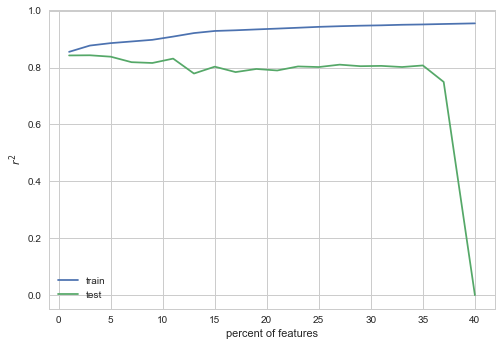

In [16]:
plt.plot(p_list, train_score, label='train')
plt.plot(p_list, np.maximum(test_score,0), label='test')
plt.ylabel("$r^2$")
plt.xlabel("percent of features")
plt.legend();

# **Exercise 3: Regularization**

Adding new features gives models more capacity to overfit. For the last exercise, we'll explore one more method for responding to overfitting: regularization. Regularization generally refers to anything that reduces the model's performance on the training data but improves performance on the test data. As you saw in our first exercise, when a large number of features are used, feature selection (in other words, reducing the number of features) tends to regularize models. Another common method is adding noise to training data. Here, we will regularize our model directly, by asking it to trade off between fitting to the training data and listening to more features.

Here, replace the `LinearRegression()` model with a version that uses regularization, either `Lasso()`, `Ridge()`, or `ElasticNet()`. Each of these models has an `alpha` parameter that you should tweak. Often, the greater the number of features, the higher `alpha` needs to be. 

Note: If you find yourself getting many `ConvergenceWarning`s then you may either increase the `max_iter` parameter, increase the `tol` parameter, or ignore the warning.

How does this step affect when and where the model is overfit or underfit?

Go through each step in your pipeline and discuss whether the step pushes the model to be more biased (in other words, to be more underfit) or have more variance (in other words, to be more overfit).

# Solution 3:

In [577]:
from sklearn import neighbors, ensemble, svm

reg = linear_model.Lasso(alpha=40)

third_pipe = pipeline.Pipeline([
    

    ("poly", preprocessing.PolynomialFeatures(degree=2, include_bias=False)),
    ("var", feature_selection.VarianceThreshold()),
    ("scale", preprocessing.StandardScaler() ),
    ("selection", feature_selection.SelectPercentile(feature_selection.f_regression, percentile=10)),
    ("regression", linear_model.Lasso(alpha=40)),
])


In [578]:
score = model_selection.cross_validate(third_pipe, x_train,y_train, scoring="r2", cv=5, return_train_score=True)
train_score = score['train_score'].mean()
test_score = score['test_score'].mean()

print(f"train score: {train_score}")
print(f"test score: {test_score}")

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

train score: 0.8901098493444835
test score: 0.8603372846420132


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [1]:
p_list = np.linspace(1, 50, 20, dtype='int')
train_score = []
test_score = []

for i, p in enumerate(p_list):

    third_pipe.set_params(selection__percentile=p)

    score = model_selection.cross_validate(
        third_pipe,
        x_train,
        y_train,
        scoring="r2",
        cv=5,
        return_train_score=True)

    train_score.append(score['train_score'].mean())
    test_score.append(score['test_score'].mean())
print(max(test_score))

0.893332949478191

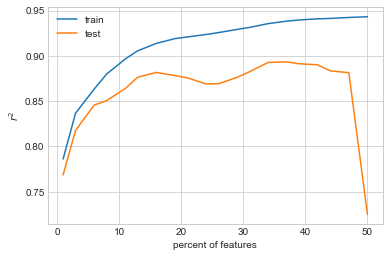

In [580]:
plt.plot(p_list, train_score, label='train')
plt.plot(p_list, test_score, label='test')
plt.ylabel("$r^2$")
plt.xlabel("percent of features")
plt.legend();